5E1. Which of the linear models below are multiple linear regressions?

(1) μi =α+βxi

(2) μi = βxxi + βzzi

(3) μi = α + β(xi − zi) 

(4) μi =α+βxxi +βzzi

Ans: 2, 4

5E2. Write down a multiple regression to evaluate the claim: Animal diversity is linearly related to latitude, but only after controlling for plant diversity. You just need to write down the model definition.

Ans:

Animal Diversity $A$

Plant Diversity $P$

Latitdue $L$

DAG:

$L \rightarrow A$

$L \rightarrow P$

$P \rightarrow A$

Model:

$A = f(L,P)$

$A \text{~} N(\mu_i,\sigma)$

$\mu_i = \alpha + \beta_L L_i + \beta_P P_i$

$\alpha, \beta_L, \beta_P \text{~} N(0,1)$

5E3. Write down a multiple regression to evaluate the claim: Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree. Write down the model definition and indicate which side of zero each slope parameter should be on.

Ans: 

amount of funding $F$

size of laboratory $S$

time to PhD degree $T$

$T \text{~} N(\mu_i, \sigma)$

$\mu_i = \alpha + \beta_F F_i + \beta_S S_i$

How can both together be positively associated with time to degree but neither by itself?

Small lab , more fund per student

Big lab, less fund per student

Whether you're in a small or big lab may by itself not influence your time to PhD same if you have small or big funds.

5E4. Suppose you have a single categorical predictor with 4 levels (unique values), labeled A, B, C and D. Let Ai be an indicator variable that is 1 where case i is in category A. Also suppose Bi, Ci, and Di for the other categories. Now which of the following linear models are inferentially equivalent ways to include the categorical variable in a regression? Models are inferentially equivalent when it’s possible to compute one posterior distribution from the posterior distribution of another model.

(1) μi = α+βAAi +βBBi +βDDi

(2) μi = α+βAAi +βBBi +βCCi +βDDi

(3) μi = α+βBBi +βCCi +βDDi

(4) μi = αAAi +αBBi +αCCi +αDDi

(5) μi = αA(1−Bi −Ci −Di)+αBBi +αCCi +αDDi

Ans: 1,3,4,5 are all inferentially equivalent. 2 is different since it has intercept $\alpha$

5M1. Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

Ans: This could be a mediator example $X \rightarrow Z \rightarrow Y$ where the relationship between predictor $X$ and outcome $Y$ vanishes if we condition on (include) the mediator $Z$

example: How much weight you can lift -> your muscle mass -> your fitness level

It could also be a common cause (Fork) example $Z \rightarrow X$ & $Z \rightarrow Y$. $X,Y$ will be correlated but if we condition on $Z$ this vanishes.

example: hot weather -> more cold drinks sold. hot weather -> more fans sold

5M2. Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.

Ans: Masked relationship example from the book: 

Consider relationship between brain size (neocortex % to body mass), body mass and energy in milk produced by a species. 

Species with big brains (with respect to their body mass like humans) have lower body mass and higher energy milk (and vice versa).

Big brains (+) , low body mass (-) , high energy (+)

Small brains (-) , large body mass (+) , low energy (-)

The masking is: if you correlate brain size with energy by itself, body mass with energy by itself, the associations will be weaker than when you add them both to the model. 

My example:

The relatioship between: how much time you spend studying $S$, how much time you spend partying (celebrating) $C$ and how popular you are $P$

5M3. It is sometimes observed that the best predictor of fire risk is the presence of firefighters— States and localities with many firefighters also have more fires. Presumably firefighters do not cause fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the same reversal of causal inference in the context of the divorce and marriage data. How might a high divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using multiple regression?

Ans: In a society where everyone is expected to / wants to be married, a high divorce rate will cause a high marriage rate.

We then would like to separate first marriage from subsequent marriages and so our data needs to include that.


From McElreath: _Better yet would be longitudinal data. In many real empirical contexts, causation involves feedback loops that can render regression fairly useless, unless some kind of time series framework is used._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

5M4. In the divorce data, States with high numbers of members of the Church of Jesus Christ of Latter-day Saints (LDS) have much lower divorce rates than the regression models expected. Find a list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate using marriage rate, median age at marriage, and percent LDS population (possibly standardized). You may want to consider transformations of the raw percent LDS variable.

Table found in: https://en.wikipedia.org/wiki/The_Church_of_Jesus_Christ_of_Latter-day_Saints_membership_statistics_(United_States)

Downloaded as csv using: https://wikitable2csv.ggor.de

In [2]:
path = '/Users/amralaa/CS - AGI core/[Prereq] Statistical Rethinking/resources/Rethinking_2/Data/WaffleDivorce.csv'

In [3]:
data = pd.read_csv(path,delimiter = ';')

In [5]:
data.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [58]:
path_wiki = '/Users/amralaa/CS - AGI core/[Prereq] Statistical Rethinking/resources/Rethinking_2/Data/LDS-table-2.csv'

In [59]:
lds = pd.read_csv(path_wiki, index_col = False)

In [60]:
lds.head()

,State,Area,Members,Population,%LDS,2011,2021,Change,Growth (%),% of Total Growth,Pew,ARDA,Unnamed: 12
0,Alabama,NA Southeast,"38,845","5,039,877",0.77%,"34,725","38,845","4,120",11.9%,0.59%,1%,10th,edit
1,Alaska,NA West,"33,250","732,673",4.54%,"32,170","33,250","1,080",3.36%,0.15%,5%,2nd,edit
2,Arizona,NA Southwest,"438,249","7,276,316",6.02%,"381,235","438,249","57,014",14.96%,8.11%,5%,2nd,edit
3,Arkansas,NA Southeast,"34,027","3,025,891",1.12%,"26,650","34,027","7,377",27.68%,1.05%,1%,9th,edit
4,California,NA West,"734,989","39,237,836",1.87%,"757,895","734,989","(22,906)",(3.02%),(3.26%),1%,2nd,edit


In [61]:
lds = lds.rename(columns = {'State':'Location','%LDS':'plds'})

In [62]:
merged = pd.merge(data,lds,on = ['Location'])

In [63]:
merged.head()

,Location,Loc,Population_x,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,...,Population_y,plds,2011,2021,Change,Growth (%),% of Total Growth,Pew,ARDA,Unnamed: 12
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,...,"5,039,877",0.77%,"34,725","38,845","4,120",11.9%,0.59%,1%,10th,edit
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,...,"732,673",4.54%,"32,170","33,250","1,080",3.36%,0.15%,5%,2nd,edit
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,...,"7,276,316",6.02%,"381,235","438,249","57,014",14.96%,8.11%,5%,2nd,edit
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,...,"3,025,891",1.12%,"26,650","34,027","7,377",27.68%,1.05%,1%,9th,edit
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,...,"39,237,836",1.87%,"757,895","734,989","(22,906)",(3.02%),(3.26%),1%,2nd,edit


In [71]:
# we need to change the %LDS from string to float
merged['n_plds'] = merged['plds'].apply(lambda x:float(x[:-1]))

In [83]:
def standardize_series(series):
    '''
    A function to standardize the values in a pandas series
    '''
    return (series - series.mean())/series.std()

In [72]:
# we standardize the %LDS score
merged['plds_std'] = standardize_series(merged.plds)

In [84]:
merged['divorce_std'] = standardize_series(merged.Divorce)
merged['marriage_std'] = standardize_series(merged.Marriage)
merged['age_std'] = standardize_series(merged.MedianAgeMarriage)

The Model:

$D = f(M,A,L)$

$D_i \text{~} N(\mu_i,\sigma)$

$\mu_i = \alpha + \beta_M M_i + \beta_A A_i + \beta_L Li$

$\alpha \text{~} N(0,0.2)$

$ \beta_M M_i , \beta_A A_i , \beta_L \text{~} N(0,0.5)$

$\sigma \text{~} Expo(1)$

In [92]:
with pm.Model() as m_5_4:
    a = pm.Normal('a', mu = 0, sd = 0.2)
    b_A = pm.Normal('b_A', mu = 0, sd = 0.5)
    b_M = pm.Normal('b_M', mu = 0, sd = 0.5)
    b_L = pm.Normal('b_L', mu = 0, sd = 0.5)
    
    sigma = pm.Exponential('sigma',1)
    
    mu = a + b_A * merged.age_std + b_M * merged.marriage_std + b_L * merged.plds_std
    
    divorce = pm.Normal('divorce',mu = mu, sd = sigma, observed = merged.divorce_std)
    
    trace_m_5_4 = pm.sample(1000, tune = 1000)

/var/folders/9p/5ycxgmps44zc3f0y6vljhp2h0000gn/T/ipykernel_29671/2308833136.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_m_5_4 = pm.sample(1000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b_L, b_M, b_A, a]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [91]:
az.summary(trace_m_5_4)

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.001,0.113,-0.211,0.211,0.002,0.002,4048.0,2912.0,1.0
b_A,-0.679,0.152,-0.948,-0.388,0.003,0.002,3396.0,2847.0,1.0
b_M,0.042,0.154,-0.261,0.321,0.003,0.002,3276.0,2945.0,1.0
b_L,-0.312,0.124,-0.563,-0.092,0.002,0.001,3735.0,2708.0,1.0
sigma,0.782,0.084,0.624,0.937,0.002,0.001,2943.0,2020.0,1.0


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


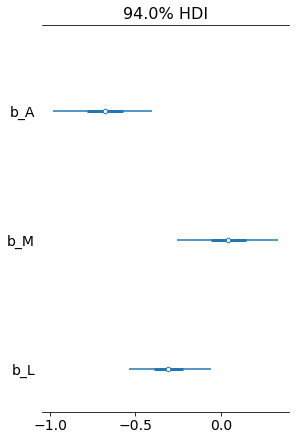

In [98]:
az.plot_forest(trace_m_5_4,var_names=[ 'b_A','b_M','b_L'], combined = True,
              figsize = (4,6));

The model expect a negative relatioship between %LDS membership and divorce rates assuming that the relationship between %LDS and divorce rate is linear. 

In [105]:
# plt.scatter(merged.plds, merged.Divorce);

5M5. One way to reason through multiple causation hypotheses is to imagine detailed mechanisms through which predictor variables may influence outcomes. For example, it is sometimes argued that the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome variable). However, there are at least two important mechanisms by which the price of gas could reduce obesity. First, it could lead to less driving and therefore more exercise. Second, it could lead to less driving, which leads to less eating out, which leads to less consumption of huge restaurant meals. Can you outline one or more multiple regressions that address these two mechanisms? Assume you can have any predictor data you need.

There are many ways these models could be constructed. Let our variables be:

$G$ price of Gasoline

$O$ obseity rate

$E$ amount of exercise people get

$D$ driving

$R$ restaurant dining

we could have a model that looks like:

$G \rightarrow E \rightarrow O$

gas prices increase, exercise increases, obseity rates decline

and we can think of an unmeasured confound $U$ that influences both $E, O$ for example the population's health awareness (if they are more health aware, will exercise more but also eat healthier which affects obsity rates). 

We can also think of $G \rightarrow R \rightarrow O$ and perhaps also unmeasured confound that affects prices of gasoline but also prices of meals at restaurants (like inflation). 


We can also think of a longer causal chain:

Gas prices -> reduce Driving -> increases exercise -> reduces Obseity 

so: 

D is a declining function of G

E is a declining function of D

O is a declining function of E

same for the second mechanism.